In [ ]:
# now including patient 31

In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

In [2]:
import dicom_numpy
import math
import dicom
import os
import numpy as np
import sys
import json
import nibabel as nib
#from scipy.ndimage import zoom

C:\Users\cht17\AppData\Local\Continuum\anaconda3\envs\tensorflowChris\lib\site-packages\dicom\__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [3]:
def extract_voxel_data(list_of_dicom_files):
    datasets = [dicom.read_file(f) for f in list_of_dicom_files]
    try:
        voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)
    except dicom_numpy.DicomImportException as e:
        # invalid DICOM data
        raise
    return voxel_ndarray

In [4]:
TestPatients =[11,30,31,41,47,52,53,54,55]
#TestPatients =[11,30,41,47,52,53,54,55] # now not including pt 31, as MRI is imported to python with different scaling


In [5]:
SelectedSlices = [[11, 23, 24, 9, 20, 14, 24, 27, 48],[89, 85, 101, 84, 97, 92, 99, 107, 130]]
#SelectedSlices = [[11, 23, 9, 20, 14, 24, 27, 48],[89, 85, 84, 97, 92, 99, 107, 130]]


In [6]:
SlicesPerPatient = [79, 63, 78, 76, 78, 79, 76, 81, 83]
#SlicesPerPatient = [79, 63, 76, 78, 79, 76, 81, 83]

In [7]:
TotalSlices = np.sum(SlicesPerPatient)
TotalSlices

693

In [8]:
CTtestArrayAll = np.zeros((512,512,0))
print(np.shape(CTtestArrayAll))
for i in range (0,len(TestPatients)):
    PathDicomCT = os.path.join("D:/CNNdata/SynCT_LargerCohort/Testing/"+str(TestPatients[i])+"/CT")
    print("PathDicomCT = ",PathDicomCT)

    lstFilesDCM_CT = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicomCT):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM_CT.append(os.path.join(dirName,filename))

    CTarray = extract_voxel_data(lstFilesDCM_CT)
    print(np.shape(CTarray))
    CTslices = np.size(CTarray,2)
    print(CTslices)

    CTtestArrayAll = np.concatenate((CTtestArrayAll,CTarray[:,:,SelectedSlices[0][i]:SelectedSlices[1][i]+1]),axis=2)


(512, 512, 0)
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/11/CT
(512, 512, 129)
129
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/30/CT
(512, 512, 117)
117
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/31/CT
(512, 512, 133)
133
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/41/CT
(512, 512, 125)
125
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/47/CT
(512, 512, 124)
124
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/52/CT
(512, 512, 157)
157
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/53/CT
(512, 512, 125)
125
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/54/CT
(512, 512, 142)
142
PathDicomCT =  D:/CNNdata/SynCT_LargerCohort/Testing/55/CT
(512, 512, 157)
157


In [9]:
np.shape(CTtestArrayAll)

(512, 512, 693)

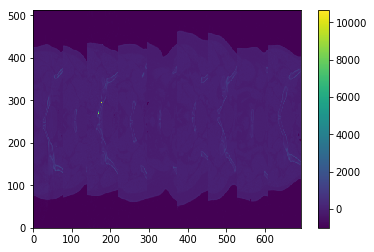

In [15]:
# n=230
# m=n+121
# plt.pcolormesh(TestArrayCT[:,0,:,n])
# plt.colorbar()

plt.pcolormesh(CTtestArrayAll[:,230,:])
plt.colorbar()

In [ ]:
# HighDens = 2000
# CTtestArrayAll[CTtestArrayAll > HighDens] = HighDens

In [ ]:
# CTtestArrayAllNorm=(CTtestArrayAll/(HighDens+1000)) +(1/3)

In [ ]:
MRtestArrayAllNorm = np.zeros((512,512,0))
print(np.shape(MRtestArrayAllNorm))
for i in range (0,len(TestPatients)):
    PathDicomMR = os.path.join("D:/CNNdata/SynCT_LargerCohort/Testing/"+str(TestPatients[i])+"/MR")
    print("PathDicomMR = ",PathDicomMR)

    lstFilesDCM_MR = []  # create an empty list
    for dirName, subdirList, fileList in os.walk(PathDicomMR):
        for filename in fileList:
            if ".dcm" in filename.lower():  # check whether the file's DICOM
                lstFilesDCM_MR.append(os.path.join(dirName,filename))

    MRarray = extract_voxel_data(lstFilesDCM_MR)
    print(np.shape(MRarray))
    MRslices = np.size(MRarray,2)
    print(MRslices)

    MRarrayCrop = MRarray[:,:,SelectedSlices[0][i]:SelectedSlices[1][i]+1]

    MinValue = np.min(MRarrayCrop)
    print("min value = ", MinValue)
    MaxValue = np.max(MRarrayCrop)
    print("max value = ", MaxValue)
    NearMaxValue = np.percentile(MRarrayCrop, 99.995)
    print("near-max value = ", NearMaxValue)

    MRarrayCrop[MRarrayCrop > NearMaxValue] = NearMaxValue
    
    MRarrayNorm=MRarrayCrop-MinValue     
    MRarrayNorm=MRarrayNorm/NearMaxValue  # now using the "near-maximum" value to remove noise etc.  
    
    MinValue = np.min(MRarrayNorm)
    print(MinValue)
    MaxValue = np.max(MRarrayNorm)
    print(MaxValue)
    
    MRtestArrayAllNorm = np.concatenate((MRtestArrayAllNorm,MRarrayNorm),axis=2)


In [ ]:
np.shape(MRtestArrayAllNorm)

In [ ]:
MRtestArrayAllNorm.dtype

In [10]:
#CTtestArrayAllNorm.dtype
CTtestArrayAll.dtype

dtype('float64')

In [ ]:

plt.subplot(1,2,1)
plt.pcolormesh(CTtestArrayAllNorm[:,250,:])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(MRtestArrayAllNorm[:,250,:])
plt.colorbar()

In [ ]:
plt.plot(MRtestArrayAllNorm[270,250,:])

In [ ]:

plt.subplot(1,2,1)
plt.pcolormesh(CTtestArrayAllNorm[200,:,:])
plt.colorbar
plt.subplot(1,2,2)
plt.pcolormesh(MRtestArrayAllNorm[200,:,:])
plt.colorbar

In [ ]:
plt.pcolormesh(MRtestArrayAllNorm[:,:,0])
plt.colorbar()


In [ ]:
# CTtestArrayAllNormNew = np.zeros((TotalSlices,1,512,512),dtype=float)
# for i in range(0,TotalSlices):
#     CTtestArrayAllNormNew[i,0,:,:] =  CTtestArrayAllNorm[:,:,i]
#     CTtestArrayAllNormNewRot = np.rot90(CTtestArrayAllNormNew[i,0,:,:],1)
# #    CTArrayAllNormNewRotFlip = np.flipud(CTArrayAllNormNewRot)
#     CTtestArrayAllNormNew[i,0,:,:] = CTtestArrayAllNormNewRot

In [11]:
CTtestArrayAllNew = np.zeros((TotalSlices,1,512,512),dtype=float)
for i in range(0,TotalSlices):
    CTtestArrayAllNew[i,0,:,:] =  CTtestArrayAll[:,:,i]
    CTtestArrayAllNewRot = np.rot90(CTtestArrayAllNew[i,0,:,:],1)
#    CTArrayAllNewRotFlip = np.flipud(CTArrayAllNewRot)
    CTtestArrayAllNew[i,0,:,:] = CTtestArrayAllNewRot

In [ ]:
MRtestArrayAllNormNew = np.zeros((TotalSlices,1,512,512),dtype=float)
for i in range(0,TotalSlices):
    MRtestArrayAllNormNew[i,0,:,:] =  MRtestArrayAllNorm[:,:,i]
    MRtestArrayAllNormNewRot = np.rot90(MRtestArrayAllNormNew[i,0,:,:],1)
#    MRtestArrayAllNormNewRotFlip = np.flipud(MRtestArrayAllNormNewRot)
    MRtestArrayAllNormNew[i,0,:,:] = MRtestArrayAllNormNewRot

In [ ]:
plt.subplot(1,2,1)
plt.pcolormesh(CTtestArrayAllNormNew[:,0,:,250])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(MRtestArrayAllNormNew[:,0,:,250])
plt.colorbar()

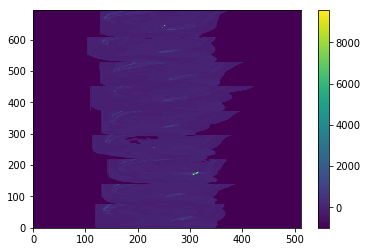

In [13]:
plt.pcolormesh(CTtestArrayAllNew[:,0,:,250])
plt.colorbar()

In [12]:
#np.save("D:/CNNdata/SynCT_LargerCohort_v3/Testing/CTtestAll.npy", CTtestArrayAllNormNew)
np.save("D:/CNNdata/SynCT_LargerCohort_v3/Testing/CTtestAll.npy", CTtestArrayAllNew)

In [ ]:
np.save("D:/CNNdata/SynCT_LargerCohort_v3/Testing/MRtestAll.npy", MRtestArrayAllNormNew)

## investigating issue with patient 31:

In [ ]:
PathDicomMR = os.path.join("D:/CNNdata/SynCT_LargerCohort/Testing/11/MR")
print("PathDicomMR = ",PathDicomMR)

lstFilesDCM_MR = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicomMR):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM_MR.append(os.path.join(dirName,filename))

MRarray11 = extract_voxel_data(lstFilesDCM_MR)
print(np.shape(MRarray11))
MRslices11 = np.size(MRarray11,2)
print(MRslices11)



In [ ]:
PathDicomMR = os.path.join("D:/CNNdata/SynCT_LargerCohort/Testing/31/MR")
print("PathDicomMR = ",PathDicomMR)

lstFilesDCM_MR = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicomMR):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM_MR.append(os.path.join(dirName,filename))

MRarray31 = extract_voxel_data(lstFilesDCM_MR)
print(np.shape(MRarray31))
MRslices31 = np.size(MRarray31,2)
print(MRslices31)

In [ ]:
plt.subplot(1,2,1)
plt.pcolormesh(MRarray11[:,:,50])
plt.colorbar()
plt.subplot(1,2,2)
plt.pcolormesh(MRarray31[:,:,50])
plt.colorbar()